<a href="https://colab.research.google.com/github/Divi-R0706/credit-card-fraud-detection/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.rename({'v1':'label','v2':'text'},axis=1,inplace=True)

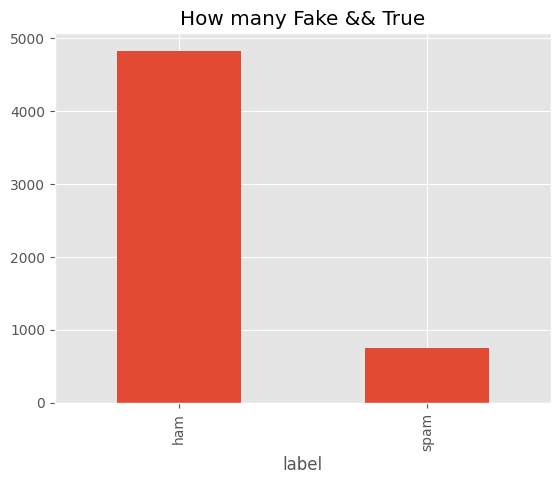

In [6]:
plt.style.use('ggplot')
data['label'].value_counts().plot(kind='bar')
plt.title('How many Fake && True')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
a = ['ham','spam','netural']
encoder.fit_transform(data['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
y = encoder.fit_transform(data['label'])
y = y.reshape(-1,1)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv2D,Dense,Embedding,Flatten,Dropout

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

In [12]:
max_len = max(len(seq) for seq in sequences)
print(max_len)

189


In [13]:
sequences_data = pad_sequences(sequences, maxlen=max_len,padding='pre')
X = sequences_data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)

In [15]:
total_words = 500

In [16]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_len - 1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(150))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None,max_len-1))

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 188, 100)            │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 188, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 188, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 150)                 │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 381,351 (1.45 MB)

 Trainable params: 381,351 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Print the actual column names in your DataFrame
print(data.columns)

# Drop any unnecessary columns and select the correct columns
# Replace 'v1' and 'v2' with the correct names from the output above
data = data[['v1', 'v2']]  # Use the actual column names here

# Convert the labels to binary (0 for legitimate/ham, 1 for spam)
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})  # Use the actual column name

# Check the first few rows of the dataset
print(data.head())

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...


In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Print the actual column names in your DataFrame
print(data.columns)  # Output: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Drop any unnecessary columns and select the correct columns
data = data[['v1', 'v2']]  # Keep only the relevant columns

# Rename the columns for clarity
data = data.rename(columns={'v1': 'label', 'v2': 'message'}) # Renaming the columns

# Convert the labels to binary (0 for legitimate/ham, 1 for spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check the first few rows of the dataset
print(data.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=42)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [21]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data; transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [22]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

Accuracy: 0.9677033492822966


In [23]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Classifier:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

Accuracy: 0.9677033492822966


In [24]:
# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
lr_predictions = lr_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))


Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.98      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672

Accuracy: 0.9527511961722488


In [25]:
# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))


SVM Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.87      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy: 0.9808612440191388


In [26]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters for Logistic Regression:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters for Logistic Regression: {'C': 100}
Best Cross-Validation Score: 0.9748717948717948
